<a href="https://colab.research.google.com/github/MarMar888/ECEDesignLabProj/blob/main/MainClean.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
# Import required libraries
import pandas as pd

# Read the CSV file
df = pd.read_csv('original_dataset.csv')

# Display the first few rows of the dataset
print("Dataset Preview:")
display(df.head())

# Display basic information about the dataset
print("\nDataset Info:")
display(df.info())

#TEST

Dataset Preview:


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 44,Unnamed: 45,Unnamed: 46,Unnamed: 47,Unnamed: 48,Unnamed: 49,Unnamed: 50,Unnamed: 51,Unnamed: 52,Unnamed: 53
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Name,Subitems,Tech Staff,Job Status,Select Printer,Slicer Project File,Paid,Materials Fee Paid (EMU),User Name,Printer Requested,...,Date Added,Date Added,Print ID,Job Time Tracking,Creation Log,Archive Date,Reason for Print,Staff Assisting,Delay Count,Print Count
2,Bensch CPU case parts,NaN,NaN,NaN,NaN,https://uw-makerspace-team.monday.com/protecte...,Pending Payment,Not Checked Yet,Vincent Bensch,Bambu Labs,...,NaN,NaN,8215168794,NaN,"Deleted member Jan 10, 2025 3:00 PM",NaN,NaN,NaN,0,1
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,00:00:00,NaN,NaN,NaN,NaN,0,1
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1973 entries, 0 to 1972
Data columns (total 54 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   1937 non-null   object
 1   Unnamed: 1   4 non-null      object
 2   Unnamed: 2   975 non-null    object
 3   Unnamed: 3   1934 non-null   object
 4   Unnamed: 4   1934 non-null   object
 5   Unnamed: 5   1934 non-null   object
 6   Unnamed: 6   1935 non-null   object
 7   Unnamed: 7   1934 non-null   object
 8   Unnamed: 8   1935 non-null   object
 9   Unnamed: 9   1935 non-null   object
 10  Unnamed: 10  1935 non-null   object
 11  Unnamed: 11  10 non-null     object
 12  Unnamed: 12  1933 non-null   object
 13  Unnamed: 13  1109 non-null   object
 14  Unnamed: 14  1934 non-null   object
 15  Unnamed: 15  78 non-null     object
 16  Unnamed: 16  400 non-null    object
 17  Unnamed: 17  1941 non-null   object
 18  Unnamed: 18  4 non-null      object
 19  Unnamed: 19 

None

In [48]:
df = df.drop(0)


In [49]:
df.columns = df.iloc[0]

In [50]:
df = df.drop(1)

In [51]:
df = df[df['Print ID'].notna()]

In [52]:
df = df.drop_duplicates(subset=['Print ID'])

In [53]:
df = df.drop_duplicates()

In [54]:
df = df.dropna(subset=['Select Printer'])

In [55]:
df.drop(columns=['Tech Staff', 'Subitems'], inplace=True)

In [56]:
df.drop(columns=['Job Status'], inplace=True)

In [57]:
df.drop(columns=['Date Added'], inplace=True)

In [58]:
df.drop(columns=['Job Time Tracking'], inplace=True)

In [59]:
df.drop(columns=['Material(s) Requested','Link','IP Address','Operation Status','Org / Course Affiliation?','Post Process Instructions','Material Notes','Material Link','Material Notes Link Link','Agreement to Pay','agree to MFG','Understand Reprints','Understand Queue','Post Process Instructions','Archive Date','Reason for Print','Staff Assisting','Delay Count','Print Count'], inplace=True)


In [60]:
df.drop(columns=['Paid', 'Materials Fee Paid (EMU)', 'User Name', 'Job Notes', 'Status'], inplace=True)

In [61]:
df.columns

Index(['Name', 'Select Printer', 'Slicer Project File', 'Printer Requested',
       'User Email', 'Printer Note', 'Material 1 Qty', 'User Type',
       'Material 1', 'Cost/Unit', 'Printed On', 'Material 2 Qty', 'Material 2',
       'Cost/Unit', 'Dup. of Cost/Unit', 'Printed On', 'Print Cost',
       'Sliced by', 'Print Time (Hours)', 'Print ID', 'Creation Log'],
      dtype='object', name=1)

In [62]:
df = df.drop(192)

In [63]:
df.columns

Index(['Name', 'Select Printer', 'Slicer Project File', 'Printer Requested',
       'User Email', 'Printer Note', 'Material 1 Qty', 'User Type',
       'Material 1', 'Cost/Unit', 'Printed On', 'Material 2 Qty', 'Material 2',
       'Cost/Unit', 'Dup. of Cost/Unit', 'Printed On', 'Print Cost',
       'Sliced by', 'Print Time (Hours)', 'Print ID', 'Creation Log'],
      dtype='object', name=1)

In [64]:
df.drop(columns=['Dup. of Cost/Unit'], inplace=True)

In [65]:

column_mapping = {
    df.columns[9]: 'Material 1 Cost/Unit',
    df.columns[13]: 'Material 2 Cost/Unit'
}

print(column_mapping)
df = df.rename(columns=column_mapping)

{'Cost/Unit': 'Material 2 Cost/Unit'}


In [66]:
df['Material 1'].unique()

array(['Bambu Labs ABS', 'Bambu Labs PLA Matte', nan,
       'Fromlabs Clear (v5)', 'Bambu Labs PETG HF',
       'Bambu Labs PETG Basic', 'Bambu Labs PETG Translucent',
       'Stratasys PC-ABS', 'Bambu Labs PLA Basic', 'Bambu Labs PLA-CF',
       'Markforged Onyx', 'Formlabs Durable (v2)',
       'Bambu Labs TPU 95A HF', 'Nylon 12', 'Ultimaker Tough PLA',
       'Formlabs Black (v4)', 'Formlabs Elastic 50A (v1)',
       'Formlabs High Temp (v2)', 'Bambu Labs ABS-GF',
       'Formlabs BioMed Clear (v1)', 'Formlabs Clear (v3)',
       'Bambu Labs PC', 'Formlabs White (v5)', 'Formlabs Tough 1500 (v1)',
       'Formlabs White (v4)', 'Formlabs Tough 1500 (v1.1)',
       'Formlabs Rigid 4000 (v1)', 'Formlabs Flexible 80A (v2)',
       'Stratasys ABS M30', 'Formlabs Black (v5)', 'Bambu Labs ASA'],
      dtype=object)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1930 entries, 7 to 1965
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  1930 non-null   object
 1   Select Printer        1930 non-null   object
 2   Slicer Project File   1929 non-null   object
 3   Printer Requested     1930 non-null   object
 4   User Email            1930 non-null   object
 5   Printer Note          1929 non-null   object
 6   Material 1 Qty        1930 non-null   object
 7   User Type             1930 non-null   object
 8   Material 1            1928 non-null   object
 9   Material 2 Cost/Unit  1928 non-null   object
 10  Printed On            1928 non-null   object
 11  Material 2 Qty        1930 non-null   object
 12  Material 2            1701 non-null   object
 13  Material 2 Cost/Unit  1701 non-null   object
 14  Printed On            1701 non-null   object
 15  Print Cost            1930 non-null   objec

In [68]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

1,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 2 Cost/Unit,Printed On,Material 2 Qty,Material 2,Material 2 Cost/Unit,Printed On,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log
24,Seat Base Devulpalali,Crane,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,vdevulapalli@wisc.edu,X1C - Black PC/White PC,124.66,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0,NaN,NaN,NaN,6.23,User with Staff Assistance,5,8337108588,Design Innovation Lab Undergraduate Staff Jan ...
25,test2789,Mantis,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,chen2465@wisc.edu,X1C - White PLA/Dual PLA,1,Undergraduate,NaN,NaN,NaN,0,Bambu Labs PLA Matte,0.05,Bambu Labs,0,Makerspace Staff,5,8337415815,Design Innovation Lab Undergraduate Staff Jan ...
27,guide_d21_t3,Monkey,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sddunham@wisc.edu,X1C - Black PLA/Blue PLA,0,Graduate,Fromlabs Clear (v5),0.24,Form 2/3,10.73,NaN,NaN,NaN,0,User with Staff Assistance,1,8343701228,Design Innovation Lab Undergraduate Staff Jan ...
102,asd,Form 2 - CarefulShaglet,https://uw-makerspace-team.monday.com/protecte...,Form 2/3/4,jeweiss4@wisc.edu,NaN,2,Undergraduate,Formlabs Durable (v2),0.26,Form 2/3,0,NaN,NaN,NaN,0.52,User with Staff Assistance,1,8648767922,Design Innovation Lab Undergraduate Staff Mar ...
104,Blade V4,Fuse 1,https://uw-makerspace-team.monday.com/protecte...,Fuse 1,tpritts@wisc.edu,Nylon 12,0.14,Undergraduate,Nylon 12,0.15,Fuse 1,0,NaN,NaN,NaN,0.02,Makerspace Staff,12,8660467421,Design Innovation Lab Undergraduate Staff Mar ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1918,OilJet,Form 3 - OvertWobbegong,https://uw-makerspace-team.monday.com/protecte...,Form 2/3/4,ghegge@wisc.edu,High Temp Resin / Clear Resin,150,Graduate,Formlabs High Temp (v2),0.29,Form 2/3,0,NaN,NaN,NaN,43.5,User with Staff Assistance,12,8789166923,Design Innovation Lab Undergraduate Staff Mar ...
1927,tee,Form 3 - OvertWobbegong,https://uw-makerspace-team.monday.com/protecte...,Form 2/3/4,tmckenna3@wisc.edu,High Temp Resin / Clear Resin,4.06,Undergraduate,Formlabs High Temp (v2),0.29,Form 2/3,0,NaN,NaN,NaN,1.18,User,2,8801177095,Design Innovation Lab Undergraduate Staff Mar ...
1931,Drivetrain Tee,Form 3 - OvertWobbegong,https://uw-makerspace-team.monday.com/protecte...,Form 2/3/4,nagarber@wisc.edu,High Temp Resin / Clear Resin,13.18,Faculty / Staff,Formlabs High Temp (v2),0.29,Form 2/3,0,NaN,NaN,NaN,3.82,Makerspace Staff,5,8810021919,Design Innovation Lab Undergraduate Staff Mar ...
1953,Heating Stage,Form 4 - ActiveBobcat,https://uw-makerspace-team.monday.com/protecte...,Form 2/3/4,nalsharif@wisc.edu,Clear Resin,16.87,Undergraduate,Fromlabs Clear (v5),0.24,Form 2/3,0,NaN,NaN,NaN,4.05,Makerspace Staff,1,8801239769,Design Innovation Lab Undergraduate Staff Mar ...


In [69]:
df.columns

Index(['Name', 'Select Printer', 'Slicer Project File', 'Printer Requested',
       'User Email', 'Printer Note', 'Material 1 Qty', 'User Type',
       'Material 1', 'Material 2 Cost/Unit', 'Printed On', 'Material 2 Qty',
       'Material 2', 'Material 2 Cost/Unit', 'Printed On', 'Print Cost',
       'Sliced by', 'Print Time (Hours)', 'Print ID', 'Creation Log'],
      dtype='object', name=1)

In [70]:
df['Material 1'] = df['Material 1'].fillna('None')
df['Material 2'] = df['Material 2'].fillna('None')
df['Material 2 Cost/Unit'] = df['Material 2 Cost/Unit'].fillna(0)
df['Material 2 Cost/Unit'] = df['Material 2 Cost/Unit'].fillna(0)
df['Printed On'] = df['Printed On'].fillna('None')
df.info()
df.isna().sum()


<class 'pandas.core.frame.DataFrame'>
Index: 1930 entries, 7 to 1965
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  1930 non-null   object
 1   Select Printer        1930 non-null   object
 2   Slicer Project File   1929 non-null   object
 3   Printer Requested     1930 non-null   object
 4   User Email            1930 non-null   object
 5   Printer Note          1929 non-null   object
 6   Material 1 Qty        1930 non-null   object
 7   User Type             1930 non-null   object
 8   Material 1            1930 non-null   object
 9   Material 2 Cost/Unit  1930 non-null   object
 10  Printed On            1930 non-null   object
 11  Material 2 Qty        1930 non-null   object
 12  Material 2            1930 non-null   object
 13  Material 2 Cost/Unit  1930 non-null   object
 14  Printed On            1930 non-null   object
 15  Print Cost            1930 non-null   objec

1
Name                    0
Select Printer          0
Slicer Project File     1
Printer Requested       0
User Email              0
Printer Note            1
Material 1 Qty          0
User Type               0
Material 1              0
Material 2 Cost/Unit    0
Printed On              0
Material 2 Qty          0
Material 2              0
Material 2 Cost/Unit    0
Printed On              0
Print Cost              0
Sliced by               0
Print Time (Hours)      0
Print ID                0
Creation Log            0
dtype: int64

In [71]:
df.shape

(1930, 20)

In [72]:
df['Material 1'].unique()

array(['Bambu Labs ABS', 'Bambu Labs PLA Matte', 'None',
       'Fromlabs Clear (v5)', 'Bambu Labs PETG HF',
       'Bambu Labs PETG Basic', 'Bambu Labs PETG Translucent',
       'Stratasys PC-ABS', 'Bambu Labs PLA Basic', 'Bambu Labs PLA-CF',
       'Markforged Onyx', 'Formlabs Durable (v2)',
       'Bambu Labs TPU 95A HF', 'Nylon 12', 'Ultimaker Tough PLA',
       'Formlabs Black (v4)', 'Formlabs Elastic 50A (v1)',
       'Formlabs High Temp (v2)', 'Bambu Labs ABS-GF',
       'Formlabs BioMed Clear (v1)', 'Formlabs Clear (v3)',
       'Bambu Labs PC', 'Formlabs White (v5)', 'Formlabs Tough 1500 (v1)',
       'Formlabs White (v4)', 'Formlabs Tough 1500 (v1.1)',
       'Formlabs Rigid 4000 (v1)', 'Formlabs Flexible 80A (v2)',
       'Stratasys ABS M30', 'Formlabs Black (v5)', 'Bambu Labs ASA'],
      dtype=object)

In [73]:
rows_with_nulls = df[df.isnull().any(axis=1)]
rows_with_nulls

1,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 2 Cost/Unit,Printed On,Material 2 Qty,Material 2,Material 2 Cost/Unit,Printed On,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log
102,asd,Form 2 - CarefulShaglet,https://uw-makerspace-team.monday.com/protecte...,Form 2/3/4,jeweiss4@wisc.edu,NaN,2,Undergraduate,Formlabs Durable (v2),0.26,Form 2/3,0,None,0,None,0.52,User with Staff Assistance,1,8648767922,Design Innovation Lab Undergraduate Staff Mar ...
131,Compression Limiters,Ox,NaN,Bambu Labs,jeweiss4@wisc.edu,X1C - Black PLA-CF/Red PLA-CF,12,Undergraduate,Bambu Labs PLA Matte,0.05,Bambu Labs,0,Bambu Labs PLA Matte,0.05,Bambu Labs,0.6,Makerspace Staff,1,8735862460,Design Innovation Lab Undergraduate Staff Mar ...


In [74]:
df.dropna(inplace=True)

#Pricing

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1928 entries, 7 to 1965
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Name                  1928 non-null   object
 1   Select Printer        1928 non-null   object
 2   Slicer Project File   1928 non-null   object
 3   Printer Requested     1928 non-null   object
 4   User Email            1928 non-null   object
 5   Printer Note          1928 non-null   object
 6   Material 1 Qty        1928 non-null   object
 7   User Type             1928 non-null   object
 8   Material 1            1928 non-null   object
 9   Material 2 Cost/Unit  1928 non-null   object
 10  Printed On            1928 non-null   object
 11  Material 2 Qty        1928 non-null   object
 12  Material 2            1928 non-null   object
 13  Material 2 Cost/Unit  1928 non-null   object
 14  Printed On            1928 non-null   object
 15  Print Cost            1928 non-null   objec

<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
/var/folders/f5/559_qhw57plby79lklrfrvm80000gn/T/ipykernel_53334/3590503308.py:2: SyntaxWarning: invalid escape sequence '\$'
  df['Print Cost'] = df['Print Cost'].replace('[\$,]', '', regex=True).astype(float)


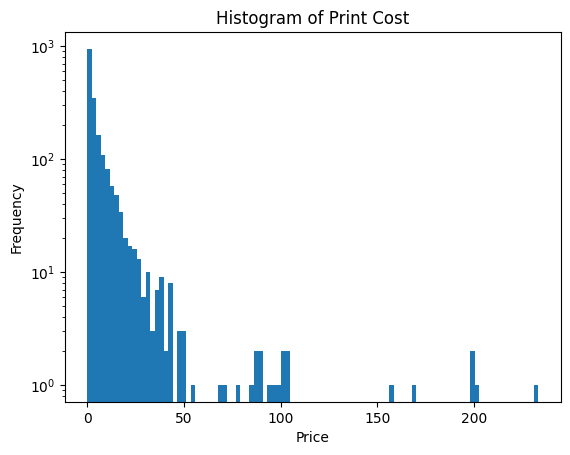

In [76]:
# Create histogram for pricing
df['Print Cost'] = df['Print Cost'].replace('[\$,]', '', regex=True).astype(float)

ax = df['Print Cost'].plot.hist(bins=100, xlabel='Price', title='Histogram of Print Cost', logy=True)
fig = ax.get_figure()
fig.savefig('HistPrintCost.png')


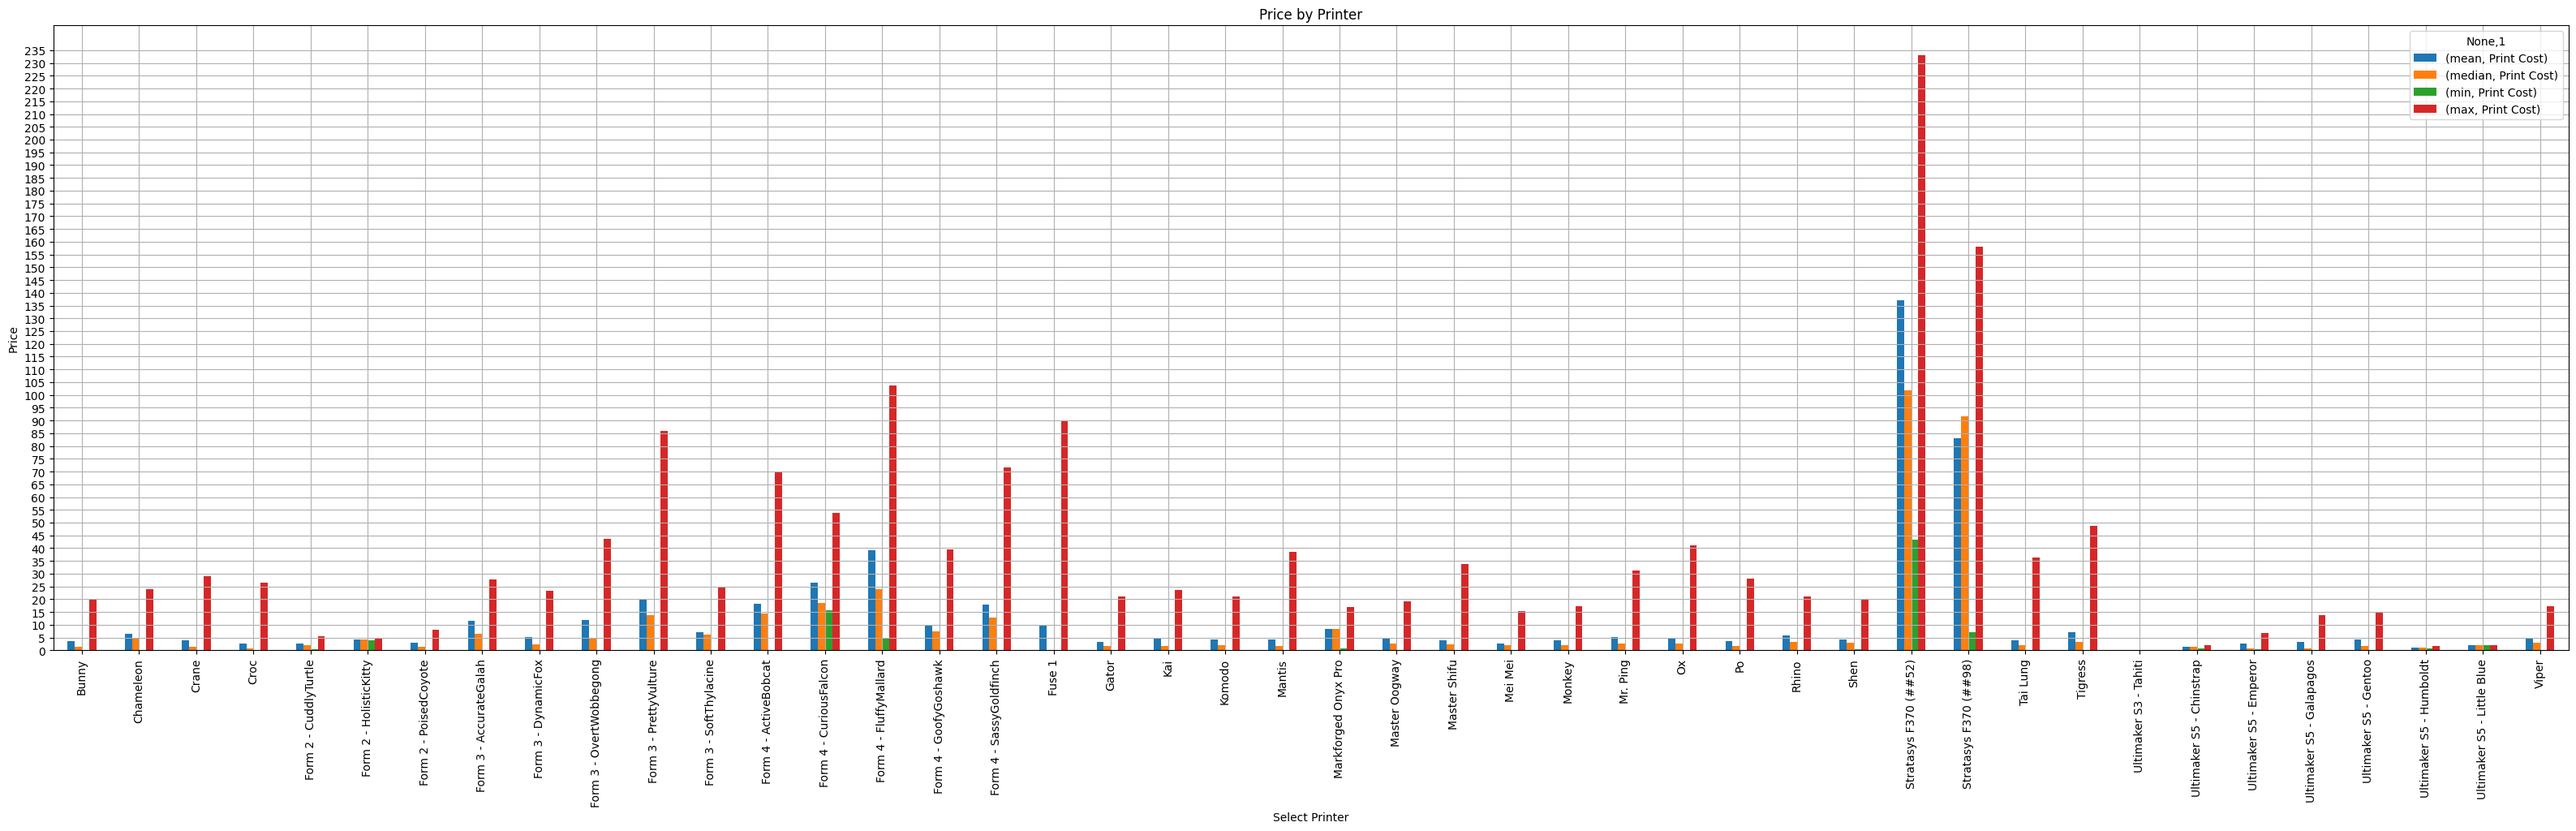

In [77]:
# Create bar chart for the average cost by printer
dfp = df.pivot_table(index='Select Printer', values='Print Cost', aggfunc=['mean', 'median', 'min', 'max'])

ax = dfp.plot.bar(figsize=(40,10), ylabel='Price', yticks=range(0,240,5), title='Price by Printer', grid=True)
fig = ax.get_figure()
fig.savefig('PriceByPrinter.png')

#Printer and Material Usage

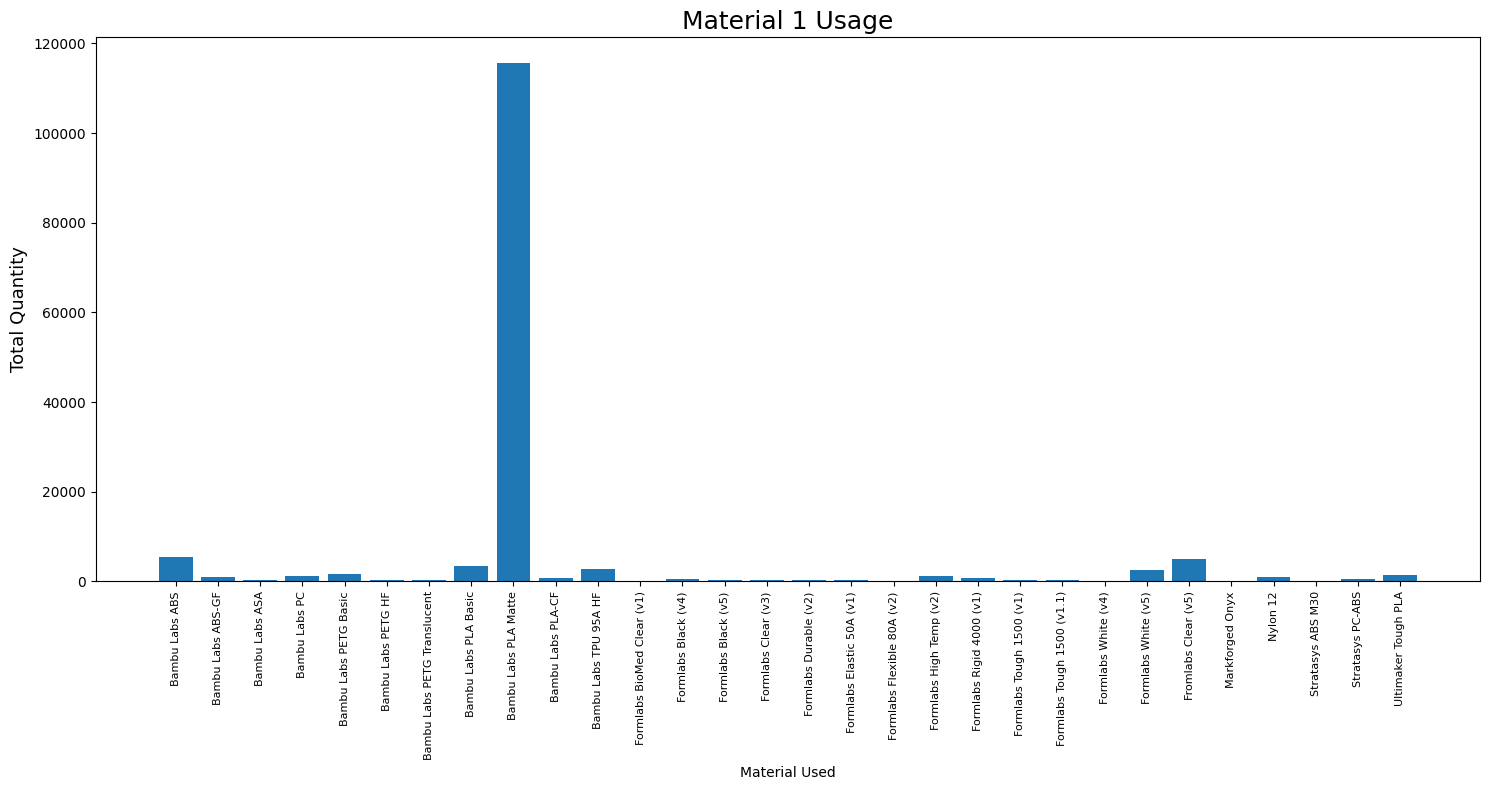


Material Usage Quantities:
Bambu Labs ABS: 5361.60
Bambu Labs ABS-GF: 1084.38
Bambu Labs ASA: 337.00
Bambu Labs PC: 1242.22
Bambu Labs PETG Basic: 1753.06
Bambu Labs PETG HF: 387.41
Bambu Labs PETG Translucent: 398.65
Bambu Labs PLA Basic: 3403.81
Bambu Labs PLA Matte: 115557.89
Bambu Labs PLA-CF: 832.77
Bambu Labs TPU 95A HF: 2766.38
Formlabs BioMed Clear (v1): 20.39
Formlabs Black (v4): 539.92
Formlabs Black (v5): 369.50
Formlabs Clear (v3): 341.00
Formlabs Durable (v2): 292.01
Formlabs Elastic 50A (v1): 415.21
Formlabs Flexible 80A (v2): 23.02
Formlabs High Temp (v2): 1324.44
Formlabs Rigid 4000 (v1): 740.99
Formlabs Tough 1500 (v1): 313.41
Formlabs Tough 1500 (v1.1): 253.11
Formlabs White (v4): 91.70
Formlabs White (v5): 2552.43
Fromlabs Clear (v5): 4957.19
Markforged Onyx: 79.61
Nylon 12: 992.85
Stratasys ABS M30: 69.82
Stratasys PC-ABS: 452.17
Ultimaker Tough PLA: 1417.64


In [78]:
import matplotlib.pyplot as plt

# Get unique materials and initialize the usage dictionary
material1names = df['Material 1'].unique()
material1names = [str(name) for name in material1names if str(name) != 'nan' and str(name) != 'None']

# Calculate usage using groupby instead of loops
material1_usage = df.groupby('Material 1')['Material 1 Qty'].sum()

# Convert Material 1 Qty to numeric if it's not already
df['Material 1 Qty'] = pd.to_numeric(df['Material 1 Qty'], errors='coerce')

# Calculate total usage for each material
material1_usage = df.groupby('Material 1')['Material 1 Qty'].sum()

# Filter out nan and None values
material1_usage = material1_usage[material1_usage.index.isin(material1names)]
rounded_material1uses = [round(num) for num in material1_usage]
# Create the bar plot
plt.figure(figsize=(15, 8))
ax = plt.bar(material1_usage.index, material1_usage.values)
plt.xticks(rotation=90, fontsize=8)
plt.title("Material 1 Usage", fontsize=18)
plt.ylabel("Total Quantity", fontsize=13)
plt.xlabel("Material Used", fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the values
print("\nMaterial Usage Quantities:")
for material, usage in material1_usage.items():
    print(f"{material}: {usage:.2f}")

Text(0.5, 0, 'Material used')

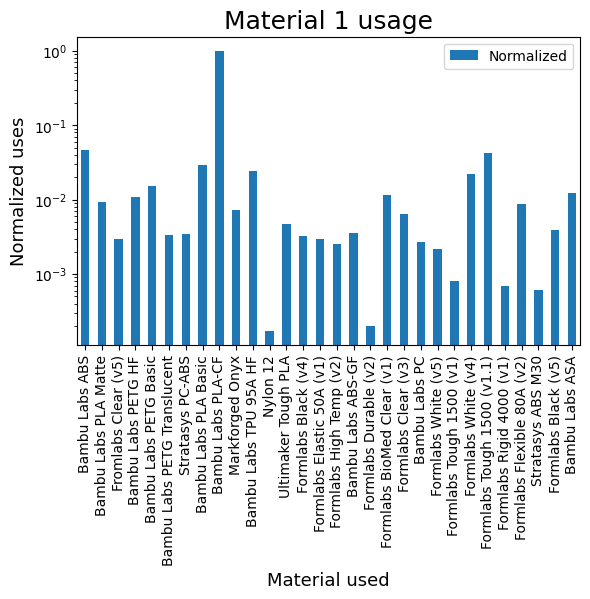

In [79]:
data = {'Category': material1names, 'Values': rounded_material1uses}
df1 = pd.DataFrame(data)

df1['Normalized'] = df1['Values'] / df1['Values'].max()

ax = df1.plot.bar(x="Category", y='Normalized', rot=90, figsize=(6.5,4), logy = True)
ax.set_title("Material 1 usage", fontsize=18)
ax.set_ylabel("Normalized uses", fontsize=13)
ax.set_xlabel("Material used", fontsize=13)

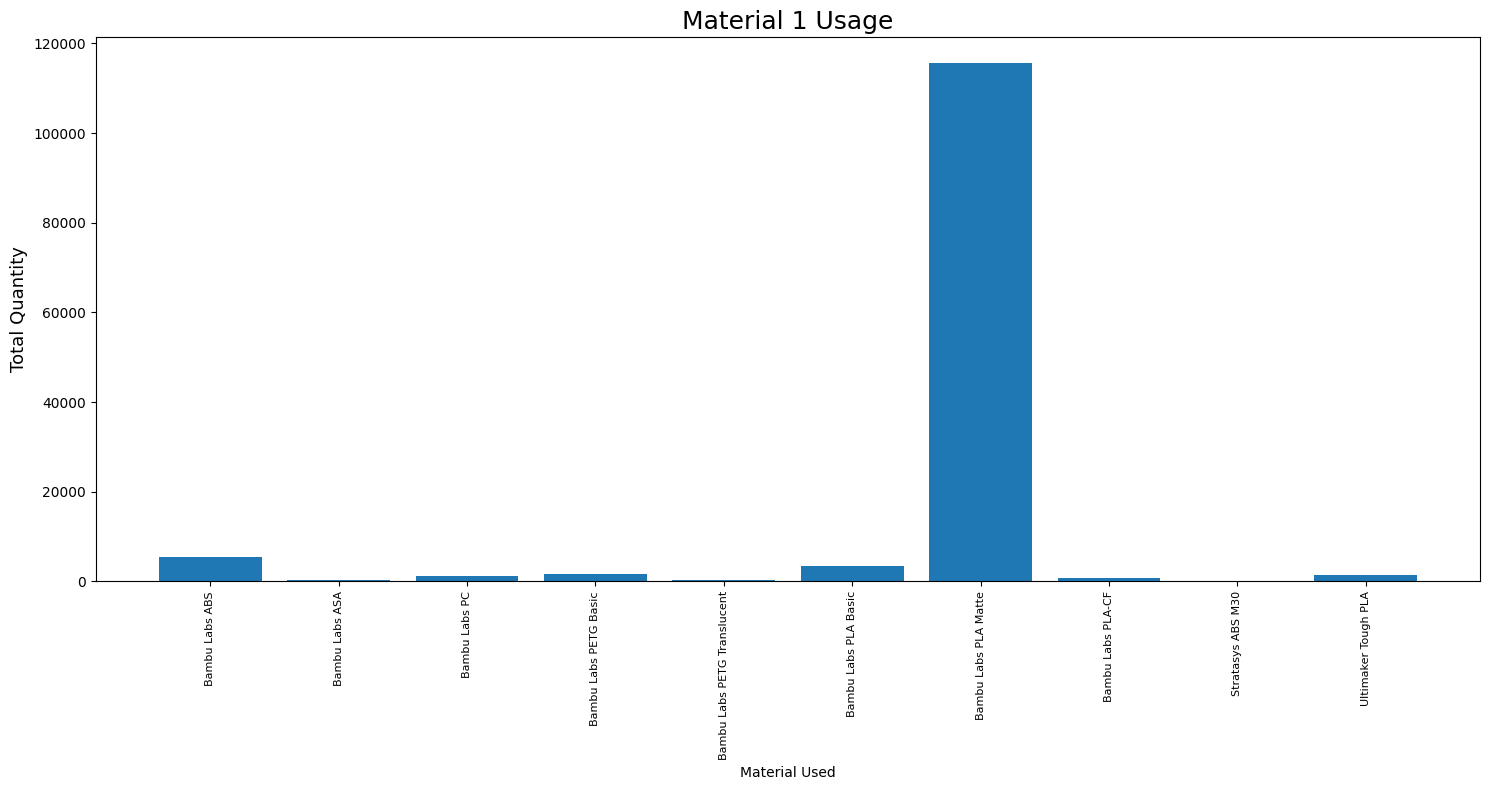


Material Usage Quantities:
Bambu Labs ABS: 5361.60
Bambu Labs ABS-GF: 1084.38
Bambu Labs ASA: 337.00
Bambu Labs PC: 1242.22
Bambu Labs PETG Basic: 1753.06
Bambu Labs PETG HF: 387.41
Bambu Labs PETG Translucent: 398.65
Bambu Labs PLA Basic: 3403.81
Bambu Labs PLA Matte: 115557.89
Bambu Labs PLA-CF: 832.77
Bambu Labs TPU 95A HF: 2766.38
Formlabs BioMed Clear (v1): 20.39
Formlabs Black (v4): 539.92
Formlabs Black (v5): 369.50
Formlabs Clear (v3): 341.00
Formlabs Durable (v2): 292.01
Formlabs Elastic 50A (v1): 415.21
Formlabs Flexible 80A (v2): 23.02
Formlabs High Temp (v2): 1324.44
Formlabs Rigid 4000 (v1): 740.99
Formlabs Tough 1500 (v1): 313.41
Formlabs Tough 1500 (v1.1): 253.11
Formlabs White (v4): 91.70
Formlabs White (v5): 2552.43
Fromlabs Clear (v5): 4957.19
Markforged Onyx: 79.61
None: 43.60
Nylon 12: 992.85
Stratasys ABS M30: 69.82
Stratasys PC-ABS: 452.17
Ultimaker Tough PLA: 1417.64


In [80]:
import matplotlib.pyplot as plt

# Get unique materials and initialize the usage dictionary
material2names = df['Material 2'].unique()
material2names = [str(name) for name in material2names if str(name) != 'nan' and str(name) != 'None']

# Calculate usage using groupby instead of loops
material1_usage = df.groupby('Material 1')['Material 1 Qty'].sum()

# Convert Material 1 Qty to numeric if it's not already
df['Material 1 Qty'] = pd.to_numeric(df['Material 1 Qty'], errors='coerce')

# Calculate total usage for each material
material2_usage = df.groupby('Material 1')['Material 1 Qty'].sum()

# Filter out nan and None values
material2_usage = material2_usage[material2_usage.index.isin(material2names)]
rounded_material2uses = [round(num) for num in material1_usage]
# Create the bar plot
plt.figure(figsize=(15, 8))
ax = plt.bar(material2_usage.index, material2_usage.values)
plt.xticks(rotation=90, fontsize=8)
plt.title("Material 1 Usage", fontsize=18)
plt.ylabel("Total Quantity", fontsize=13)
plt.xlabel("Material Used", fontsize=10)

# Adjust layout to prevent label cutoff
plt.tight_layout()

# Show the plot
plt.show()

# Print the values
print("\nMaterial Usage Quantities:")
for material, usage in material1_usage.items():
    print(f"{material}: {usage:.2f}")

#Segmentation of users

Print Time Statistics by User Type:
                           average                std             median  \
1               Print Time (Hours) Print Time (Hours) Print Time (Hours)   
User Type                                                                  
Faculty / Staff                4.8               4.61                4.0   
Graduate                       4.3               5.36                2.0   
Undergraduate                  3.8               5.72                2.0   

                               max                min  
1               Print Time (Hours) Print Time (Hours)  
User Type                                              
Faculty / Staff                 24                  1  
Graduate                        48                  1  
Undergraduate                   60                  1  


/var/folders/f5/559_qhw57plby79lklrfrvm80000gn/T/ipykernel_53334/4272808986.py:7: FutureWarning: The provided callable <function std at 0x105b16020> is currently using DataFrameGroupBy.std. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "std" instead.
  pivot_table = df.pivot_table(
/var/folders/f5/559_qhw57plby79lklrfrvm80000gn/T/ipykernel_53334/4272808986.py:7: FutureWarning: The provided callable <function median at 0x105c76520> is currently using DataFrameGroupBy.median. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "median" instead.
  pivot_table = df.pivot_table(
/var/folders/f5/559_qhw57plby79lklrfrvm80000gn/T/ipykernel_53334/4272808986.py:7: FutureWarning: The provided callable <function max at 0x105b154e0> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current b

<Figure size 1000x600 with 0 Axes>

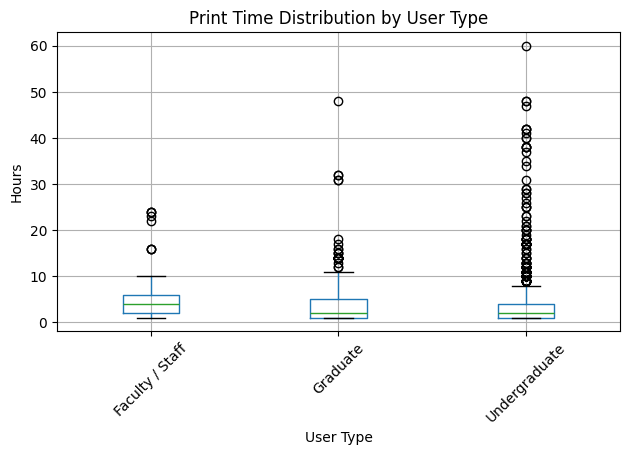

In [81]:
import numpy as np

# Convert 'Print Time (Hours)' to numeric, coercing errors to NaN
df['Print Time (Hours)'] = pd.to_numeric(df['Print Time (Hours)'], errors='coerce')

# Now create the pivot table
pivot_table = df.pivot_table(
    index='User Type',
    values='Print Time (Hours)',
    aggfunc=[np.average, np.std, np.median, np.max, np.min]
)

# Display the results
print("Print Time Statistics by User Type:")
print(pivot_table.round(2))  # Round to 2 decimal places for cleaner display

# Optional: Create a box plot to visualize the distribution
plt.figure(figsize=(10, 6))
df.boxplot(column='Print Time (Hours)', by='User Type')
plt.title('Print Time Distribution by User Type')
plt.suptitle('')  # This removes the automatic suptitle
plt.ylabel('Hours')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [82]:
import numpy as np
import pandas as pd

# Assuming df is your DataFrame
# Group the data by 'User Type'
grouped = df[['Print Time (Hours)', 'User Type']].groupby('User Type')

# Function to find outliers using IQR
def find_outliers(group):
    Q1 = group['Print Time (Hours)'].quantile(0.25)
    Q3 = group['Print Time (Hours)'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = group[(group['Print Time (Hours)'] < lower_bound) | (group['Print Time (Hours)'] > upper_bound)]
    return outliers

# Apply the function to each group
outliers = grouped.apply(find_outliers)

# Display the outliers
print("Outliers in 'Print Time (Hours)' by User Type:")
print(outliers)

Outliers in 'Print Time (Hours)' by User Type:
1                     Print Time (Hours)        User Type
User Type                                                
Faculty / Staff 113                   24  Faculty / Staff
                234                   22  Faculty / Staff
                334                   24  Faculty / Staff
                351                   16  Faculty / Staff
                449                   24  Faculty / Staff
...                                  ...              ...
Undergraduate   1891                  15    Undergraduate
                1920                  47    Undergraduate
                1934                  10    Undergraduate
                1935                  48    Undergraduate
                1937                  17    Undergraduate

[160 rows x 2 columns]


/var/folders/f5/559_qhw57plby79lklrfrvm80000gn/T/ipykernel_53334/1291081985.py:19: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  outliers = grouped.apply(find_outliers)


Available columns:
['Name', 'Select Printer', 'Slicer Project File', 'Printer Requested', 'User Email', 'Printer Note', 'Material 1 Qty', 'User Type', 'Material 1', 'Material 2 Cost/Unit', 'Printed On', 'Material 2 Qty', 'Material 2', 'Material 2 Cost/Unit', 'Printed On', 'Print Cost', 'Sliced by', 'Print Time (Hours)', 'Print ID', 'Creation Log']


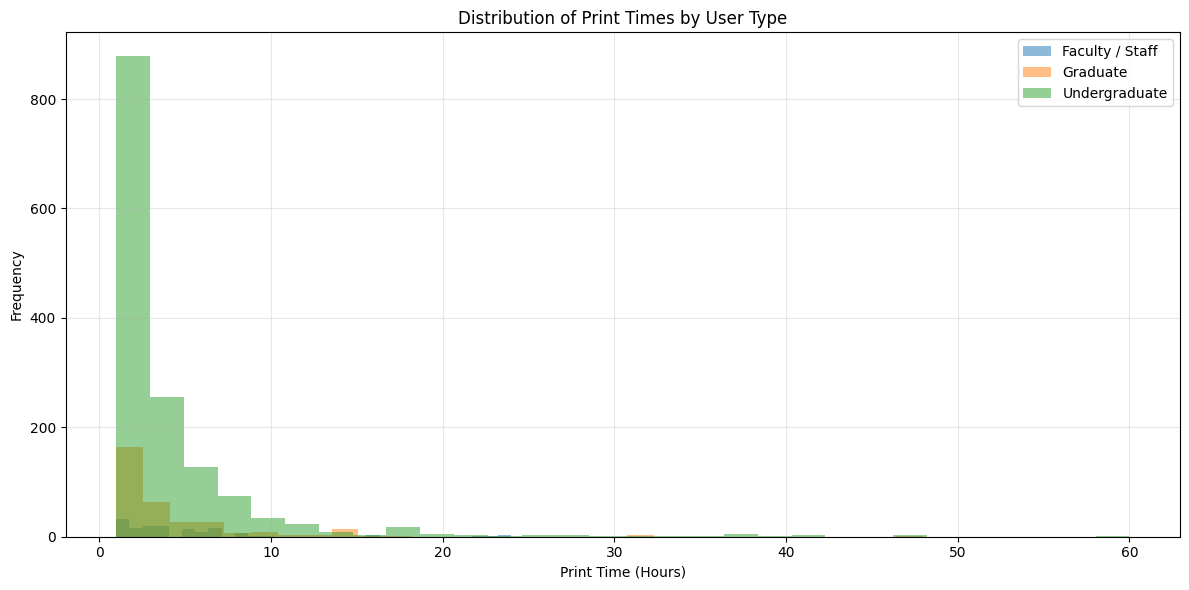


Summary Statistics by User Type:
                 Count  Mean  Median  Std Dev  Min  Max
User Type                                              
Faculty / Staff    143   4.8     4.0     4.61    1   24
Graduate           324   4.3     2.0     5.36    1   48
Undergraduate     1461   3.8     2.0     5.72    1   60


In [83]:
import numpy as np
import matplotlib.pyplot as plt

# Verify the column names in your DataFrame
print("Available columns:")
print(df.columns.tolist())

# Now create the visualization with the correct DataFrame name
# Group the data by 'User Type'
grouped = df.groupby('User Type')

# Plot a histogram for each user type
plt.figure(figsize=(12, 6))

# Create histograms for each user type
for user_type, group in grouped:
    plt.hist(pd.to_numeric(group['Print Time (Hours)'], errors='coerce'), 
             alpha=0.5, 
             label=user_type, 
             bins=30)

plt.title('Distribution of Print Times by User Type')
plt.xlabel('Print Time (Hours)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Print summary statistics
print("\nSummary Statistics by User Type:")
summary = df.groupby('User Type')['Print Time (Hours)'].agg([
    ('Count', 'count'),
    ('Mean', 'mean'),
    ('Median', 'median'),
    ('Std Dev', 'std'),
    ('Min', 'min'),
    ('Max', 'max')
]).round(2)
print(summary)

In [84]:
df.pivot_table(
    index='User Type',
    columns='Material 1',
    values='Print Time (Hours)',
    aggfunc=[np.average]
)

average                                                 \
Material 1      Bambu Labs ABS Bambu Labs ABS-GF Bambu Labs ASA Bambu Labs PC   
User Type                                                                       
Faculty / Staff       1.800000               NaN            NaN           2.0   
Graduate              6.285714          3.285714            NaN           6.0   
Undergraduate         3.000000          3.666667            6.0           4.0   

                                                          \
Material 1      Bambu Labs PETG Basic Bambu Labs PETG HF   
User Type                                                  
Faculty / Staff              4.000000                NaN   
Graduate                     8.714286               18.0   
Undergraduate                2.066667                4.5   

                                                                  \
Material 1      Bambu Labs PETG Translucent Bambu Labs PLA Basic   
User Type                                                          
Faculty / Staff                         NaN             2.500000   
Graduate                                NaN             2.000000   
Undergraduate                      5.333333             2.567568   

                                                        ...  \
Material 1      Bambu Labs PLA Matte Bambu Labs PLA-CF  ...   
User Type                                               ...   
Faculty / Staff             4.314286              6.00  ...   
Graduate                    3.465608              2.75  ...   
Undergraduate               3.290265              2.25  ...   

                                                                \
Material 1      Formlabs Tough 1500 (v1.1) Formlabs White (v4)   
User Type                                                        
Faculty / Staff                        NaN                 NaN   
Graduate                          3.333333                 3.0   
Undergraduate                     1.600000                 1.0   

                                                                              \
Material 1      Formlabs White (v5) Fromlabs Clear (v5) Markforged Onyx None   
User Type                                                                      
Faculty / Staff              7.2000            3.714286             NaN  NaN   
Graduate                     2.0000            3.480000             NaN  NaN   
Undergraduate                2.0625            3.540541             5.0  4.0   

                                                             \
Material 1      Nylon 12 Stratasys ABS M30 Stratasys PC-ABS   
User Type                                                     
Faculty / Staff    22.00               NaN              NaN   
Graduate            2.50               NaN              NaN   
Undergraduate      15.75         28.666667          30.1875   

                                     
Material 1      Ultimaker Tough PLA  
User Type                            
Faculty / Staff           12.750000  
Graduate                  12.800000  
Undergraduate              7.863636  

[3 rows x 31 columns]

In [85]:
import pandas as pd
import numpy as np

# Define material categories
material_categories = {
    'PLA': ['PLA Basic', 'PLA Matte', 'PLA-CF', 'Tough PLA'],
    'Resin': ['Tough 1500', 'White', 'Clear'],
    'Nylon': ['Nylon 12', 'Onyx'],
    'ABS': ['ABS', 'ABS-GF', 'ABS M30'],
    'PC': ['PC', 'PC-ABS'],
    'PETG': ['PETG Basic', 'PETG HF', 'PETG Translucent']
}
def get_material_category(material_name):
    for category, keywords in material_categories.items():
        if any(keyword.lower() in material_name.lower() for keyword in keywords):
            return category
    return 'Other'  # For any materials that don't match the categories

# Add new column with material categories
df['Material_Category1'] = df.apply(lambda row: get_material_category(row['Material 1']), axis=1)
df['Material_Category2'] = df.apply(lambda row: get_material_category(row['Material 2']), axis=1)



In [86]:
df.head()

1,Name,Select Printer,Slicer Project File,Printer Requested,User Email,Printer Note,Material 1 Qty,User Type,Material 1,Material 2 Cost/Unit,...,Material 2,Material 2 Cost/Unit,Printed On,Print Cost,Sliced by,Print Time (Hours),Print ID,Creation Log,Material_Category1,Material_Category2
7,FMEP Cubes 1,Komodo,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,bmdavidson2@wisc.edu,X1E - ABS White/ASA White,420.82,Graduate,Bambu Labs ABS,0.05,...,Bambu Labs ASA,0.05,Bambu Labs,21.04,User,14,8171785086,Design Innovation Lab Undergraduate Staff Jan ...,ABS,ABS
8,AED_Drone_Parts_1,Tigress,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Black PLA/White PLA,55.00,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs PLA Matte,0.05,Bambu Labs,2.75,Makerspace Staff,2,8214378089,Design Innovation Lab Undergraduate Staff Jan ...,PLA,PLA
9,AED_Drone_Parts_2,Master Shifu,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,lprodgers@wisc.edu,X1C - Blue PLA/Gray PLA,97.00,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs PLA Matte,0.05,Bambu Labs,4.85,User,3,8214392486,Design Innovation Lab Undergraduate Staff Jan ...,PLA,PLA
10,Top-Down Mount v1,Master Oogway,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,sifferman@wisc.edu,X1C - White PLA/Purple PLA,274.64,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs PLA Matte,0.05,Bambu Labs,13.73,User,9,8238119583,Design Innovation Lab Undergraduate Staff Jan ...,PLA,PLA
11,BES Base,Viper,https://uw-makerspace-team.monday.com/protecte...,Bambu Labs,baschmall@wisc.edu,X1C - White ASA/Teal ASA,36.50,Graduate,Bambu Labs PLA Matte,0.05,...,Bambu Labs PLA Matte,0.05,Bambu Labs,1.83,User,1,8269757333,Design Innovation Lab Undergraduate Staff Jan ...,PLA,PLA



Number of prints by User Type and Material Category:
Material_Category1  ABS  Nylon  Other   PLA  Resin
User Type                                         
Faculty / Staff      13      1      0   112     17
Graduate             73      6      0   203     42
Undergraduate       181     12      2  1197     69


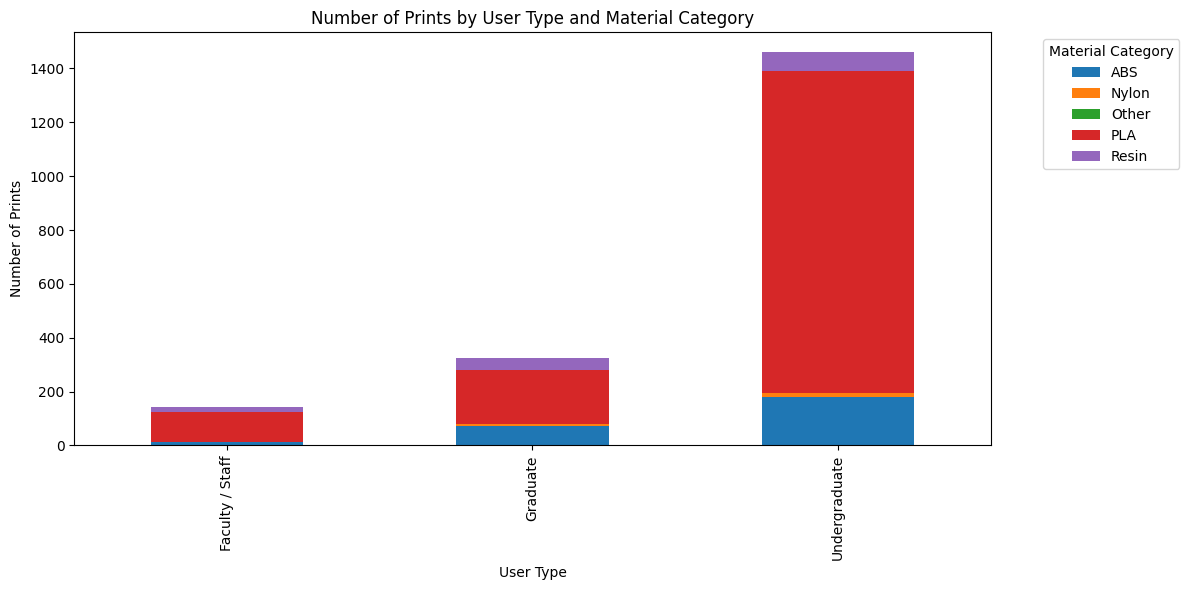


Percentage distribution of materials for each user type:
Material_Category1    ABS  Nylon  Other    PLA  Resin
User Type                                            
Faculty / Staff      9.09   0.70   0.00  78.32  11.89
Graduate            22.53   1.85   0.00  62.65  12.96
Undergraduate       12.39   0.82   0.14  81.93   4.72


In [87]:
import numpy as np
import pandas as pd

# First, create the material categories if not already done
material_categories = {
    'PLA': ['PLA Basic', 'PLA Matte', 'PLA-CF', 'Tough PLA'],
    'Resin': ['Tough 1500', 'White', 'Clear'],
    'Nylon': ['Nylon 12', 'Onyx'],
    'ABS': ['ABS', 'ABS-GF', 'ABS M30'],
    'PC': ['PC', 'PC-ABS'],
    'PETG': ['PETG Basic', 'PETG HF', 'PETG Translucent']
}

def get_material_category(material_name):
    if pd.isna(material_name) or material_name == 'None':
        return 'Other'
    for category, keywords in material_categories.items():
        if any(keyword.lower() in str(material_name).lower() for keyword in keywords):
            return category
    return 'Other'

# Add material category column
df['Material_Category1'] = df['Material 1'].apply(get_material_category)

# Create the pivot table
pivot_df = df.pivot_table(
    index='User Type',
    columns='Material_Category1',
    values='Print Time (Hours)',
    aggfunc='count',
    fill_value=0
)

# Display the pivot table
print("\nNumber of prints by User Type and Material Category:")
print(pivot_df)

# Optional: Create a stacked bar plot visualization
ax = pivot_df.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('Number of Prints by User Type and Material Category')
plt.xlabel('User Type')
plt.ylabel('Number of Prints')
plt.legend(title='Material Category', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

# Optional: Show percentages for each user type
print("\nPercentage distribution of materials for each user type:")
percentage_df = pivot_df.div(pivot_df.sum(axis=1), axis=0) * 100
print(percentage_df.round(2))

In [88]:
df.drop(columns=['User Email','Material_Category2'], inplace=True)

In [89]:
df['Creation Log'] = df['Creation Log'].str.replace('Design Innovation Lab Undergraduate Staff ', '', regex=False)
df['Creation Log'] = df['Creation Log'].str.replace('Deleted member ', '', regex=False)
